## What is Classification

Classification is a type of supervised learning technique using to predict a category/class for a given data

### Types of Classification

1. Binary: Two possible Classifications
2. Multiclass: Two or more categories
3. Multilabel: Each input can belong to multiple classes at once
4. Ordinal: Classes with a defined order

### Examples of Classification
- Spam Detection (Binary): Predicting wether a email is spam or not
- Image Detection (Multiclass):  Classifiying if an image is a Cat,Dog, Horse, etc.
- Classifying news (Multilabel): Classifying is news is Politcal, Technological, World, etc
- Rating a Product (Ordinal): Classifying is a product is Bad, Average, Good, Excellent

### Common Algorithms

1. Logisitc Regression: A linear model thats uses the sigmoid function to model binary outputs
2. Decision Tree: Splits data in a tree like strucutre based on feature conditions
3. Random Forest: Multiple Decision Trees used to creative a majority voting system of classification
4. Support Vector Machine: Finds the optimal hyperplane boundary in seperating classes
5. K-Nearest Neighbours (KNN): Classifies based on k closest data points

### Model Evaluation

1. Confusion Metrics: A table to show how many of the predictions are right/wrong
    - TP: True Positives
    - FP: False Positives
    - TN: True Negatives
    - FN: False Negatives
2. Basic Metrics
    - Accuracy: The ratio of correction predictions to total predictions. A = (TP + TN) / Total
    - Precision: The ratio of true positives to all predicited positives. P = TP / (TP + FN)
    - Recall: The ratio of true positives to all actual positives. R = TP / (TP + FN)


Now lets go further in depth into the classification models

### Logistic Regression

Despite its name logisitc regression is a common classifcation algorithm used to predict binary classification problems. Like is an email spam (Spam/Not Spam), Will it rain today (Yes/No).

The model uses the sigmoid function to crunch the output of the models prediction into a range of 0 - 1. Where if the probability is greater than 0.5 (or some other threshold), the model predicts class 1 else 0

#### How it Works

![](./images/Logisitic_Regression_Step1.jpg)
![](./images/Logisitic_Regression_Step2.jpg)
![](./images/Logisitic_Regression_Step3.jpg)


Now lets see it in practice

In [3]:
# 📦 Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 🔧 Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# 🔀 Model Selection / Validation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

# 📊 Metrics & Evaluation
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    average_precision_score,
    hamming_loss,
    roc_auc_score,
    roc_curve,
    auc,
    label_ranking_average_precision_score
)

# 🧠 Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.multioutput import MultiOutputClassifier

# ⚖️ Resampling
from imblearn.over_sampling import SMOTE

# 🧪 Datasets
from sklearn.datasets import make_multilabel_classification


#### Data Preprocessing

In [4]:
df = pd.read_csv('Obesity Classification.csv')
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [5]:
df.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [6]:
df['Gender'] = df['Gender'].map(lambda x: 1 if x == 'Male' else 0)
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,Normal Weight
1,2,30,0,160,60,22.5,Normal Weight
2,3,35,1,180,90,27.3,Overweight
3,4,40,0,150,50,20.0,Underweight
4,5,45,1,190,100,31.2,Obese


In [7]:
df.Label.unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

In [8]:
df['Label'] = df['Label'].map(lambda x: 1 if x == 'Obese' else 0)

In [9]:
df_lr = df.copy()
df_lr.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,0
1,2,30,0,160,60,22.5,0
2,3,35,1,180,90,27.3,0
3,4,40,0,150,50,20.0,0
4,5,45,1,190,100,31.2,1


In [10]:
df_lr['Label'].value_counts(normalize=True)

Label
0    0.888889
1    0.111111
Name: proportion, dtype: float64

In [11]:
def target_analysis(df,target):
    plt.figure(figsize=(12,8))
    for col in df.columns:
        if col != target:
            sns.scatterplot(x = col, y = target, data=df)
            plt.title(f"Scatter plot of {col} vs {target}")
            plt.show()
            

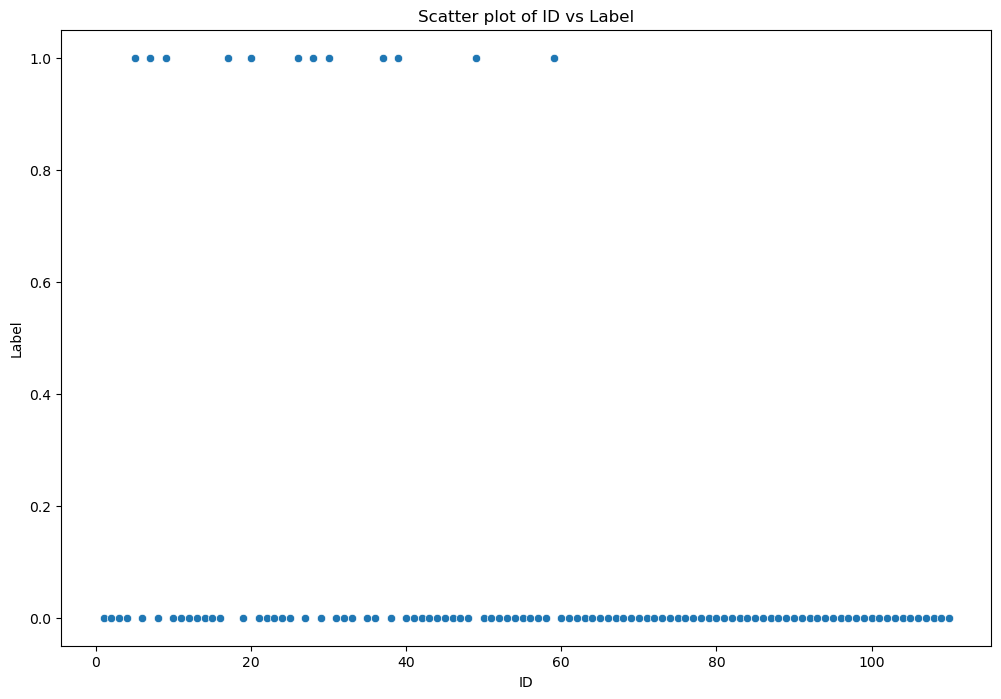

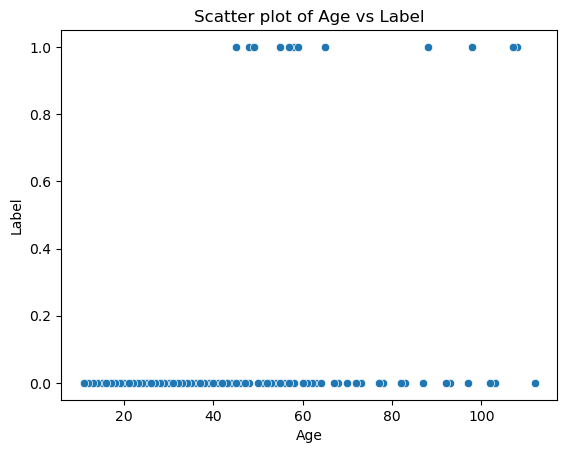

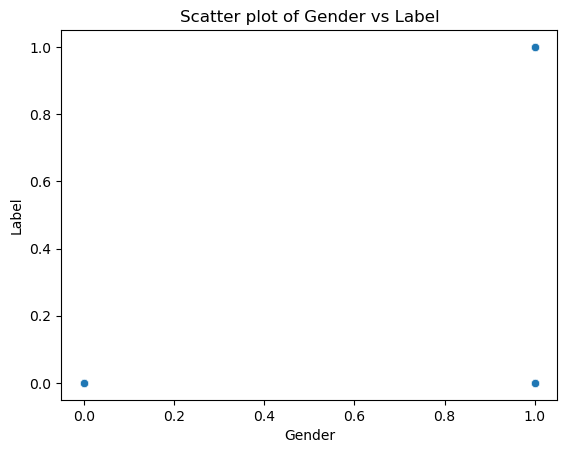

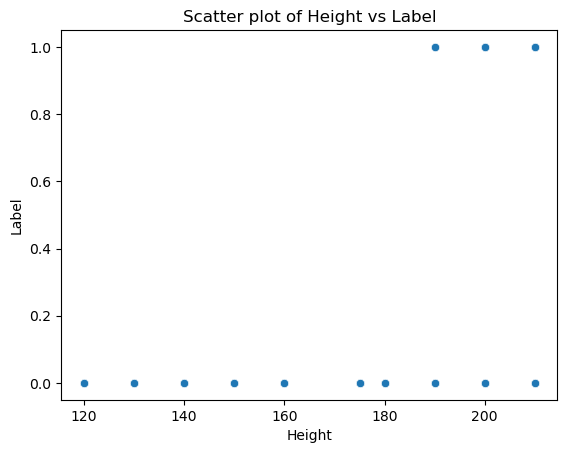

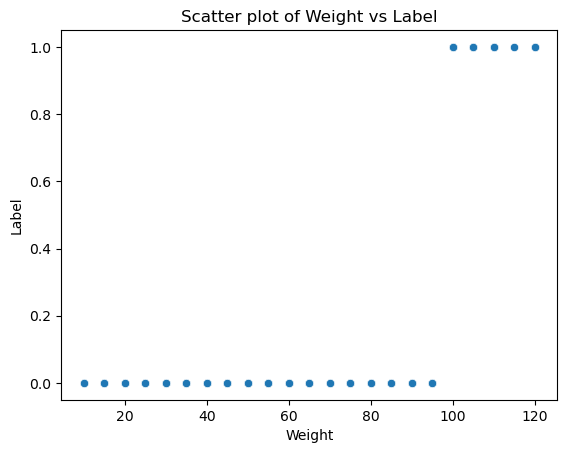

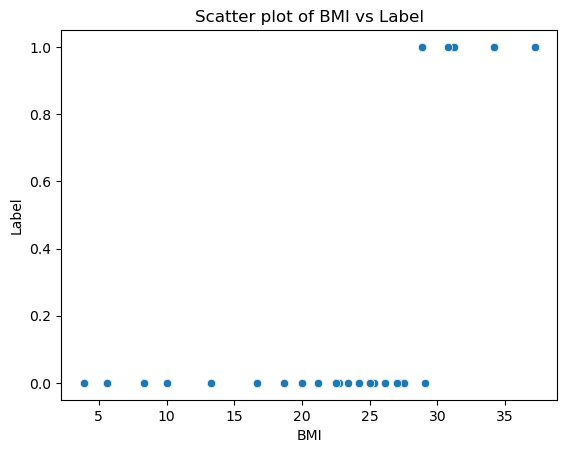

In [12]:
target_analysis(df_lr,'Label')

In [13]:
def plot_eval(y_test,y_pred):
    
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot = True, fmt = 'd',linewidths=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(classification_report(y_test, y_pred))
    



Logsitic Regression Score: 1.0


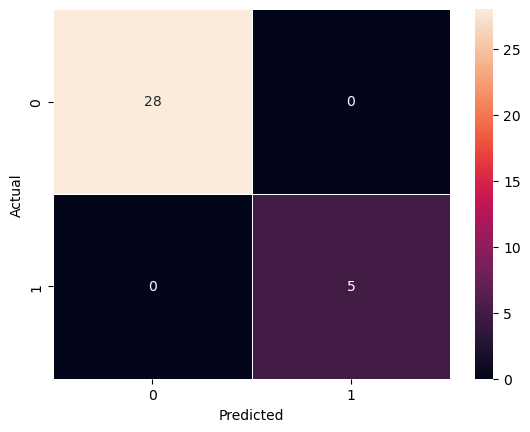

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00         5

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [14]:
X = df_lr.drop('Label', axis = 1)
y = df_lr['Label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=100)
model.fit(X_train , y_train)

y_pred = model.predict(X_test)

score = model.score(X_test, y_test)
print(f"Logsitic Regression Score: {score}")

plot_eval(y_test,y_pred)

Since logisitc regression is built on a linear model, it is dependent on the weights of our features. 

So if we have 2 features on varying scales like age which usually ranges from 18-100 in most datasets.

And a feature like salary which ranges from 30,000-300,000

As we can see, these features vary on scale widely. Leading to the optimizers preforming poorly. 

So its better for us to scale our features before modeling

Lets compare the score after scaling

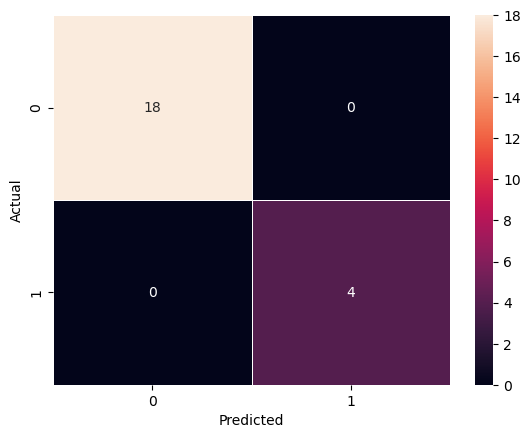

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         4

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

Logsitic Regression Score (After Scaling): 1.0


In [15]:
scaler = StandardScaler()

X = df_lr.drop('Label', axis = 1)
y = df_lr['Label']

feature_names = X.columns

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plot_eval(y_test,y_pred)

print(f"Logsitic Regression Score (After Scaling): {score}")

#### Hyperparameter tuning using GridSearch

Logisitic Regression models has a few hyperparameters that we can see to alter the preformance of the model. Lets briefly explain these parameters

1. penalty: The type of regularization the model applies
    - 'l1', 'l2','elasticnet','none'
2. C: The inverse of regularization strength
3. solver: The optimization algorithm
    - 'lbfgs','liblinear','saga', etc
4. max_iter: Max number of iterations to converge to a min value for the loss function


#### Regularization Techniques

Regularization helps prevent our model from memorizing or overfitting from the data by penalizing large coefficients. Logisitic Regression supports different types of regulaization methods via the penalty parameter
    - L1: Encourages feature selection
    - L2: Encourages smaller coefficents
    - Elastic Net: Combines L1 and L2 penalities 

#### L1 Regularization

In [16]:
params_l1 = {
    'penalty': ['l1'],
    'C':np.logspace(-4,4,20),
    'solver':['liblinear','saga'], # 'liblinear' and 'saga' only support L1
    'max_iter': [10,50,100]
}

grid_l1 = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid=params_l1,
    cv = 5,
    scoring='accuracy'
)

grid_l1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [10, 50, 100], 'penalty': ['l1'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [17]:
print(f"Best parameters for L1 Regularization : {grid_l1.best_params_}")
print(f"Best cross validation accuracy for L1 Regularization: {grid_l1.best_score_}")

Best parameters for L1 Regularization : {'C': 29.763514416313132, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross validation accuracy for L1 Regularization: 1.0


Now Lets retrain the model with the best parameters

In [18]:
lr_l1 = LogisticRegression(**grid_l1.best_params_, random_state=42)
lr_l1.fit(X_train, y_train)
y_pred_l1 = lr_l1.predict(X_test)
accuracy_l1 = lr_l1.score(X_test, y_test)

coefficients_l1 = pd.Series(lr_l1.coef_[0], index =feature_names)
selected_features_l1 = coefficients_l1[coefficients_l1 != 0].sort_values()
print(selected_features_l1)

ID       -0.589791
Height    1.438358
Weight    7.624984
BMI       9.400633
dtype: float64


The coefficents of L1 tell us that the BMI is heavily important in labeling the obiesity of an individual. And tells us that the ID and Height feature has no significance

#### L2 Regularization

In [19]:
params_l2 = {
    'penalty': ['l2'],
    'C':np.logspace(-4,4,20),
    'solver':['liblinear','saga','lbfgs'], # 'liblinear' and 'saga' only support L1
    'max_iter': [10,50,100]
}

grid_l2 = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid=params_l2,
    cv = 5,
    scoring='accuracy'
)

grid_l2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [10, 50, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='accuracy')

In [20]:
print(f"Best parameters for L2 Regularization : {grid_l2.best_params_}")
print(f"Best cross validation accuracy for L2 Regularization: {grid_l2.best_score_}")

Best parameters for L2 Regularization : {'C': 11.288378916846883, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross validation accuracy for L2 Regularization: 1.0


In [21]:
lr_l2 = LogisticRegression(**grid_l2.best_params_, random_state=42)
lr_l2.fit(X_train, y_train)
y_pred_l2 = lr_l2.predict(X_test)
accuracy_l2 = lr_l2.score(X_test, y_test)

coefficients_l2 = pd.Series(lr_l2.coef_[0], index =feature_names)
selected_features_l2 = coefficients_l2[coefficients_l2 != 0].sort_values()
print(selected_features_l2)

ID       -1.412699
Gender    0.041049
Age       0.405296
Height    2.251719
BMI       3.526824
Weight    3.648577
dtype: float64


#### Elasticnet

In [22]:
params_elasticnet = {
    'penalty':['elasticnet'],
    'l1_ratio': [0.1,0.5,0.9], # The mix of l1 and l2 regularization
    'C': np.logspace(-4,4,20),
    'solver': ['saga'], # only saga supports elasticnet regularization
    'max_iter': [100,500,1000]
}

grid_elastic_net = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid= params_elasticnet,
    cv = 5,
    scoring='accuracy'
)

grid_elastic_net.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'l1_ratio': [0.1, 0.5, 0.9],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['elasticnet'], 'solver': ['saga']},
             scoring='accuracy')

In [23]:
(f"Best parameters for Elasticnet Regularization : {grid_elastic_net.best_params_}")
print(f"Best cross validation accuracy for Elasticnet Regularization: {grid_elastic_net.best_score_}")

Best cross validation accuracy for Elasticnet Regularization: 1.0


So as we can see, having 90% l1 ratio split tells us that the best preformance comes when the model is able to enact feature selection. This makes sense since one of our columns is id which clearly does not provide anything to the classification

In [24]:
lr_elastic = LogisticRegression(** grid_elastic_net.best_params_, random_state=42)
lr_elastic.fit(X_train, y_train)
y_pred_elastic = lr_elastic.predict(X_test)

accuracy_elastic = lr_elastic.score(X_train, y_train)

coefficients_elastic = pd.Series(lr_elastic.coef_[0], index =feature_names)
selected_features_elastic = coefficients_elastic[coefficients_elastic != 0].sort_values()
print(selected_features_elastic)

ID       -0.374813
Height    1.139780
Weight    3.458381
BMI       4.539631
dtype: float64


#### Probability estimation

Since Logisitc Regression estimates probilities, we can use different evaluation metrics like ROC and Precision Recall.

1. ROC Curve (Receiver Operating Characteristic): A graph that shows the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance
    - In Simplier terms a ROC curve tells us how good a model is at telling two things/classification apart. The curve shows how the accuracy of the model changes
    - Where the X-axis is the false alarms or False positive rate
    - The y-axis is the true catches or the True positive rate
ROC is good for imbalanced dataset because it focuses on the ratios of TP and FP rather than the actual counts. Since in an imbalanced dataset, a model can be 99% accurate just by always saying "not spam", but this is clearly a useless conclusion. ROC bypasses this.

2. PR Curve (Precision Recall): Provides a graph showing how good a model is at finding positive cases and the models confidence about them
    - Precision: Of all the emails marked as spam, how many were really spam
    - Recall: How many spam emails did i catch


In [25]:
y_prob = lr_elastic.predict_log_proba(X_test)[:,1]
y_prob

array([-1.05233808e+01, -7.45039822e+00, -1.94195703e-01, -2.18115427e+01,
       -6.38920759e+00, -8.84126774e+00, -1.14429636e+01, -8.17103838e+00,
       -2.33720993e+01, -1.25307002e+01, -2.02283806e+01, -2.23805764e+01,
       -4.99194911e+00, -1.39305437e+01, -5.53930162e-03, -1.96759909e+01,
       -3.28738432e-01, -3.41769420e+00, -2.69601011e+01, -3.82688357e+00,
       -4.92856172e+00, -2.89896702e-02])

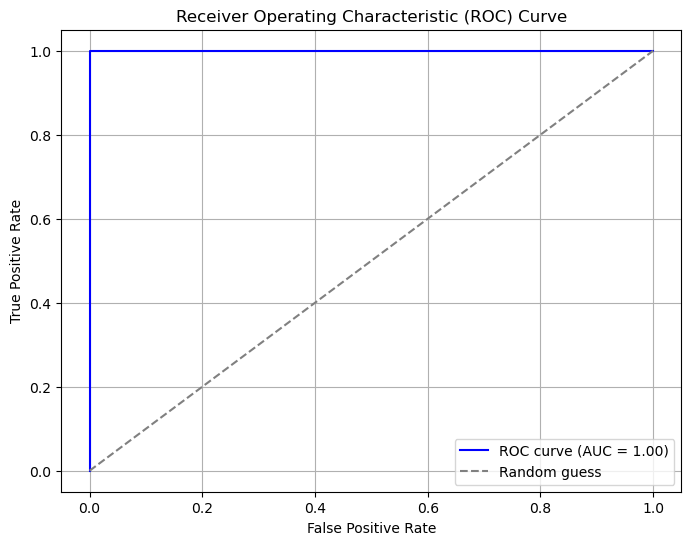

In [26]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Decision Tree Classifier

Decision Tree is a supervised machine learning algorithm used for classification tasks. Where the tree represents a flowchart of nodes representing features and branches representing decision parameters.

![](./images/decision_tree_structure.jpg)
![](./images/decision_tree_terms.jpg)
![](./images/decision_tree_example.jpg)

The goal of each decision split is the maximize the information gain, which means each feature is better at seperating data in pure subsets

At each split in the tree, the algorithm asks:
"Which feature helps me reduce the most confusion right now?"
The answer = the one with the highest Information Gain


Decision Trees are prone to overfitting, as if the model has too many splits what can happen is that leaf nodes may only contain a few samples. So the model only learns on a few samples and essentially just memorizes those samples. Impacting the models ability to generalize to new data. 

We can prevent this by...

1. Setting a max depth: Limit the amount of decision the tree splits the data into
2. Min Samples split: Require a minimum number of samples to make a split
3. Min Samples leaf: Require a minimum number of samples in a leaf node
4. Pruning: Removing uncessary branches after the tree is built

In [27]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [28]:
df['person_gender'] = df['person_gender'].map(lambda x: 1 if x == 'male' else 0)
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(lambda x: 1 if x == 'Yes' else 0)

In [29]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [30]:
encoder = OrdinalEncoder(categories=[['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate']])

df['person_education'] = encoder.fit_transform(df[['person_education']])


In [31]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [32]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas') # Changes the encoding columns in the df
ohe_transform = ohe.fit_transform(df[['loan_intent','person_home_ownership']])
df = pd.concat([df,ohe_transform], axis = 1).drop(columns=['loan_intent','person_home_ownership'])

In [33]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22.0,0,0.0,71948.0,0,35000.0,16.02,0.49,3.0,561,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,21.0,0,1.0,12282.0,0,1000.0,11.14,0.08,2.0,504,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25.0,0,1.0,12438.0,3,5500.0,12.87,0.44,3.0,635,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,23.0,0,2.0,79753.0,0,35000.0,15.23,0.44,2.0,675,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,24.0,1,0.0,66135.0,1,35000.0,14.27,0.53,4.0,586,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Since decision tree is a threshold based splitting algortihm the scale/ distribution of the features does not impact preformance. So we can just directly train the model now

In [34]:
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

So we can see our dataset is quite imbalanced, we can use stratified train_test_split

In [35]:
X = df.drop('loan_status', axis =1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

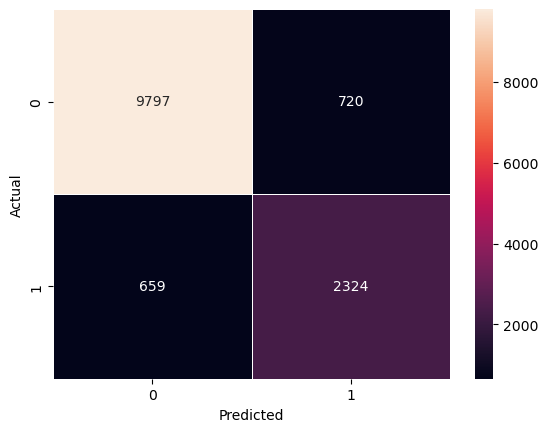

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10517
           1       0.76      0.78      0.77      2983

    accuracy                           0.90     13500
   macro avg       0.85      0.86      0.85     13500
weighted avg       0.90      0.90      0.90     13500

Accuracy of decision tree:0.8978518518518519


In [36]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plot_eval(y_test,y_pred)

accuracy_tree= model.score(X_test, y_test)
print(f"Accuracy of decision tree:{accuracy_tree}")

Now lets check to see if our model is overfitting. We can find this out by comparing the preformance of the train and test predictions. If the training accuracy is high and the test is low, our model is overfitting

In [37]:
# Predict on train & test sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Test Accuracy:", accuracy_score(y_test, test_preds))


Train Accuracy: 1.0
Test Accuracy: 0.8978518518518519


#### GridSearchCV for hyperparameters

Some parameters for decision tree that we can optimize

1. max_depth: The max depth the tree can grow
2. min_samples_split: The min number of samples required to split an internal node
    - so if min_samples_split = 10, then a node must have 10 samples to be split
3. min_samples_leaf: The min number of samples that a leaf node can contain
    - so if min_samples_leaf = 5, then evert leaf must have 5 samples (helps prevent overfitting)
4. criterion (default = 'gini'): Decides how to evaluate the best split
    - gini (gini impurity)
    - 'entropy': Information gain


In [38]:
params_decision_tree = {
    'max_depth': [None,3,5,7,10,15],
    'min_samples_split': [2,5,10,20],
    'min_samples_leaf':[2,4,6,8,10],
    'criterion':['gini','entropy']
}

grid_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params_decision_tree,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1
    
)

grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 10, 15],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [39]:
print(f"Best parameters: {grid_tree.best_params_}")
print(f"Best cross-validation accruacy: {grid_tree.best_score_}")

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20}
Best cross-validation accruacy: 0.9181269841269841


#### Training the model on optimal parameters

In [40]:
best_params = grid_tree.best_params_

dtree_best = DecisionTreeClassifier(**best_params)

dtree_best.fit(X_train,y_train)

y_pred = dtree_best.predict(X_test)

accuracy_best = dtree_best.score(X_test,y_test)

print(f"Test Accuracy with best parameters: {accuracy_best:.2f}")

Test Accuracy with best parameters: 0.92


#### Cross val scores

In [41]:
skf = StratifiedKFold(n_splits=10, shuffle=True)
cv_scores_skf = cross_val_score(dtree_best,X_train, y_train, cv = skf, scoring='accuracy')

print(f"Mean CV Accuracy using StratifiedKFold: {cv_scores_skf.mean():.2f}")


Mean CV Accuracy using StratifiedKFold: 0.92


#### Visulaizing the Decision Tree Structure

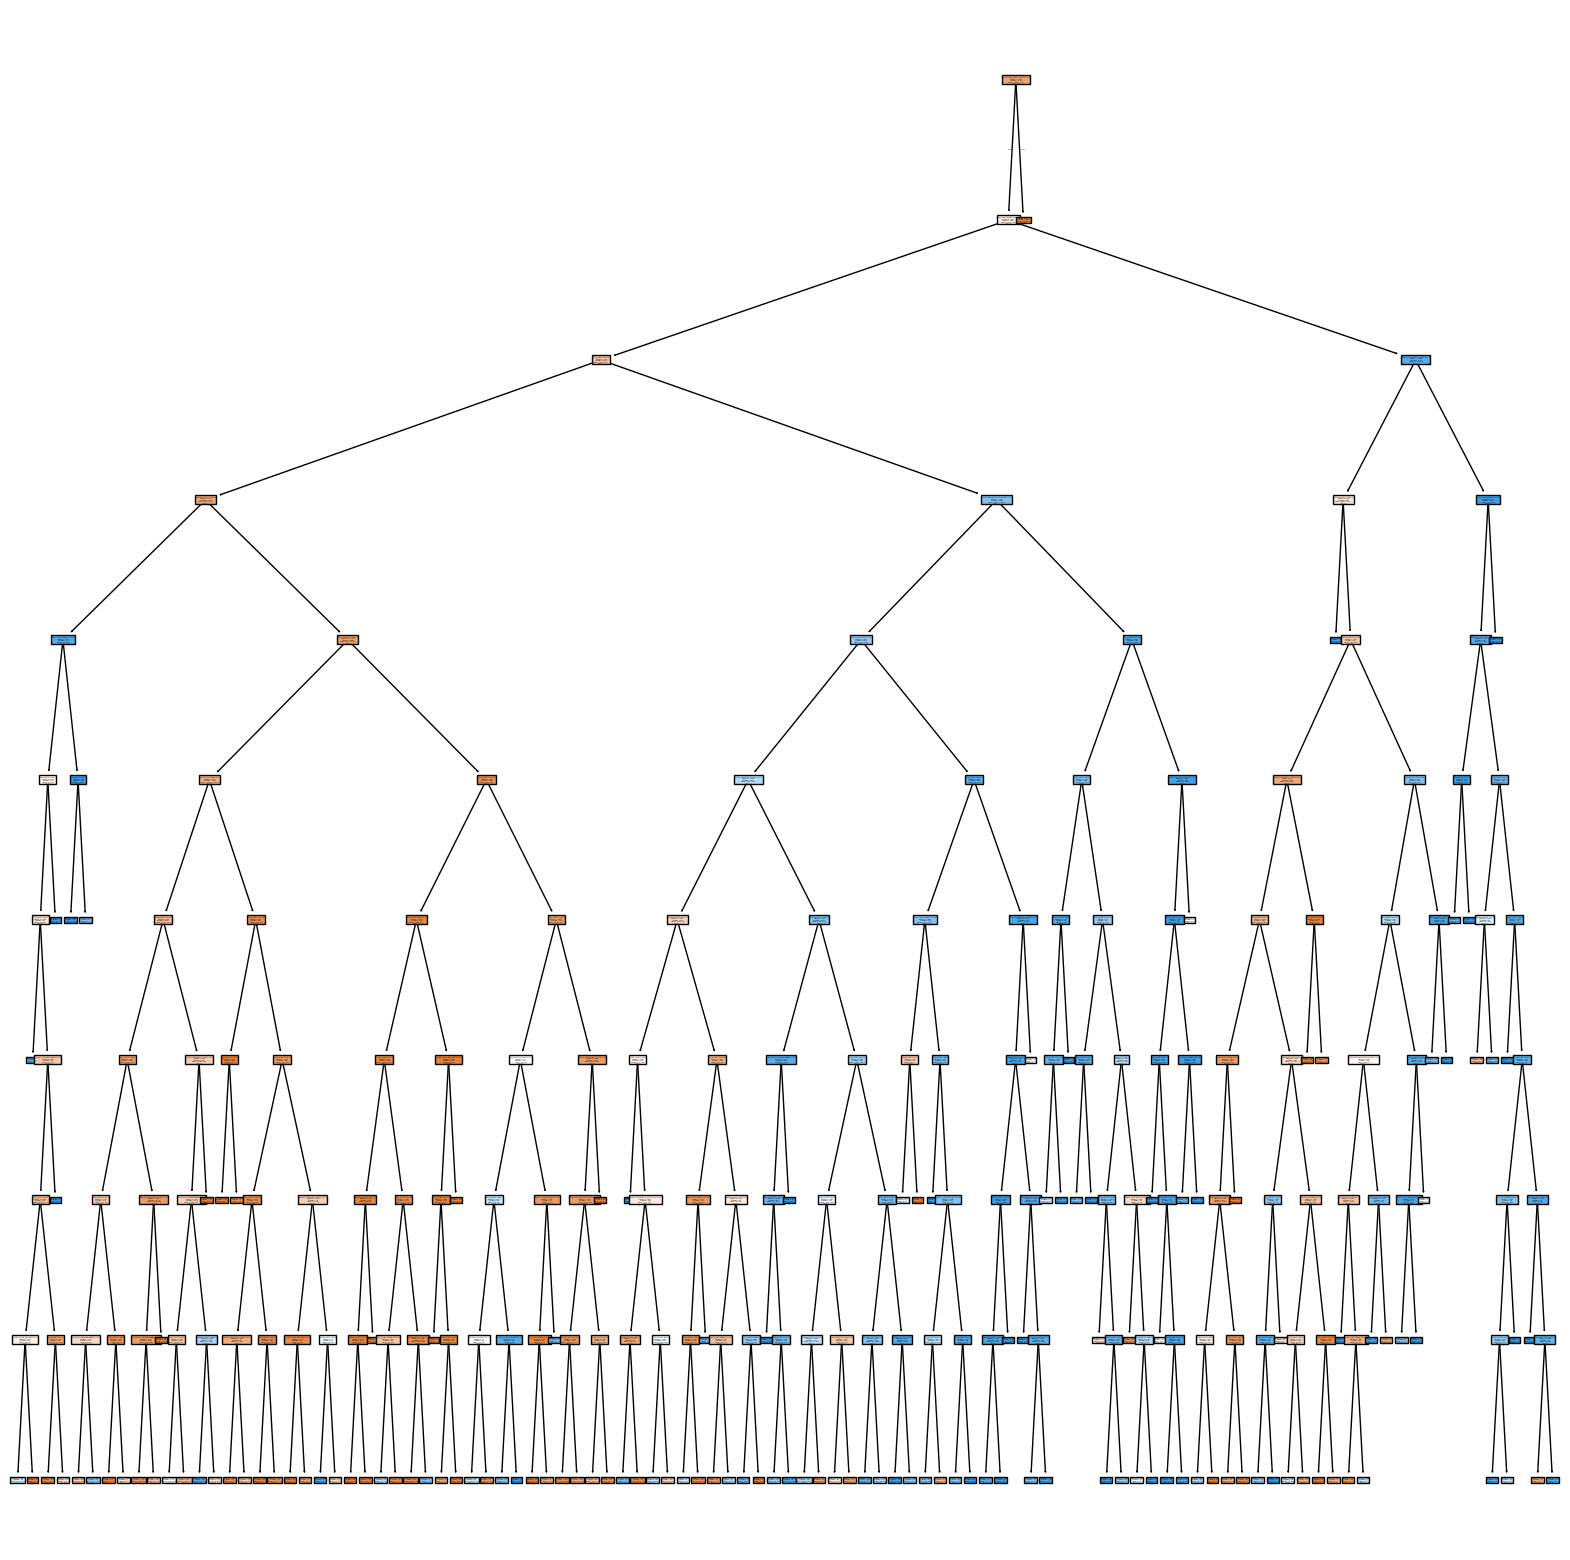

In [42]:
plt.figure(figsize=(20,20))
plot_tree(
    dtree_best, 
    feature_names=X.columns, 
    class_names=list(map(str, dtree_best.classes_)),
    filled=True
)
plt.show()


### Random Forest Classifier

Random forest Classifier is a model that takes multiple decision trees (Forest) and combines their output via majority vote to create a more accurate model. 

As we've seen single decision trees are quite prone to overfitting, but a collection of trees where each tree is trained on a random subset of the data fixes the problem

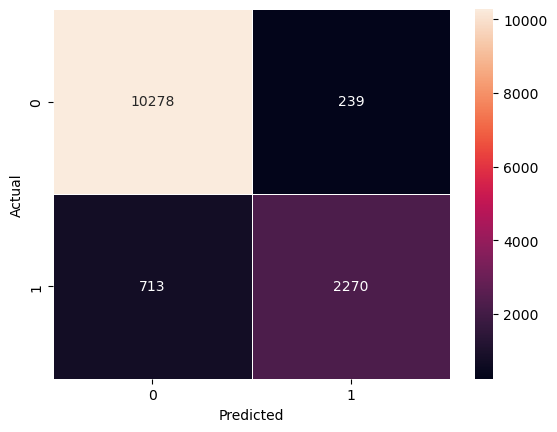

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10517
           1       0.90      0.76      0.83      2983

    accuracy                           0.93     13500
   macro avg       0.92      0.87      0.89     13500
weighted avg       0.93      0.93      0.93     13500

Random Forest Score: 0.9294814814814815


In [43]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = model.score(X_test,y_test)

plot_eval(y_test,y_pred)

print(f"Random Forest Score: {score}")

#### GridSearchCV for hyperparameters

Some parameters for random forest that we can optimize

1. n_estimators: The number of trees in the forest
2. max_features: Number of features to consider at each split
3. max_depth: the max_depth for each decision tree
4. min_samples_split: the min number of samples to split a node
5. min_samples_leaf: min number of samples at a leaf node
6. criterion: metric used to evaluate split quality


In [44]:
params_rf = {
    'n_estimators': [100, 300],
    'max_features': ['sqrt'],   
    'max_depth': [5, 10],        
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [2, 5],  
    'criterion': ['gini']       
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params_rf,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300]},
             scoring='accuracy')

In [45]:
print(f"Best parameters: {grid_rf.best_params_}")
print(f"Best cross-validation accruacy: {grid_rf.best_score_}")

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation accruacy: 0.9231111111111112


In [46]:
rf_best = RandomForestClassifier(**grid_rf.best_params_, random_state=42)

rf_best.fit(X_train, y_train)
score = rf_best.score(X_test,y_test)

print(f"Score of Random Forest with optimal parameters: {score}")

Score of Random Forest with optimal parameters: 0.9263703703703704


In [47]:
skf = StratifiedKFold(n_splits=10, shuffle=True)
cv_scores_skf = cross_val_score(rf_best,X_train, y_train, cv = skf, scoring='accuracy')

print(f"Mean CV Accuracy using StratifiedKFold: {cv_scores_skf.mean():.2f}")


Mean CV Accuracy using StratifiedKFold: 0.92


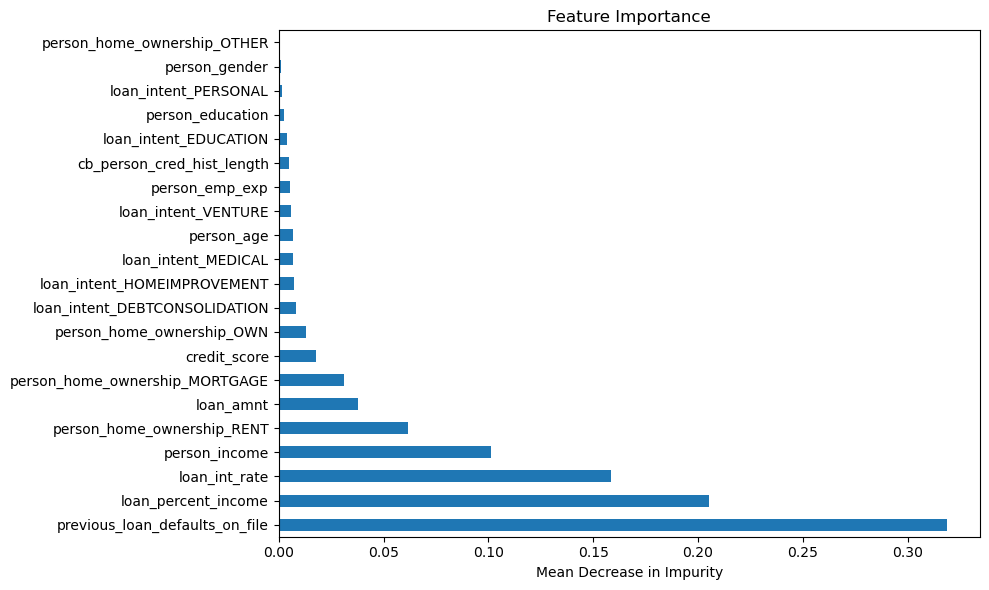

In [48]:
importance = rf_best.feature_importances_
features = X.columns

importance_df = pd.Series(importance, index=features).sort_values(ascending=False)

importance_df.plot(kind='barh', figsize=(10, 6), title='Feature Importance')
plt.xlabel("Mean Decrease in Impurity")
plt.tight_layout()
plt.show()

### Support Vector Machine

SVM is a classification algorithm that tries to find a boundary line that seperates data points of differing classes. Best for Binary classification tasks

SVM tries to draw a line in a hyperplane that seperates the data points, whilst maximizing margin (meaning the largest distance between the line and nearest points from each class)


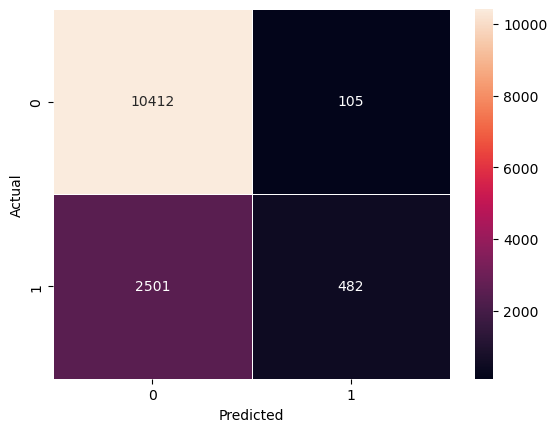

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     10517
           1       0.82      0.16      0.27      2983

    accuracy                           0.81     13500
   macro avg       0.81      0.58      0.58     13500
weighted avg       0.81      0.81      0.75     13500

SVM Score: 0.806962962962963


In [49]:
model = SVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = model.score(X_test, y_test)

plot_eval(y_test,y_pred)
print(f"SVM Score: {score}")

#### Hyperparameter tuning

1. C (Regularization parameter): The tradeoff between margin size and classification error
    - Smaller values of C allows for more misclassifications but better generalization
    - Larger values of C tries to map all training points, leading to overfitting
2. Kernel: The function that allows data to be mapped into higher dimensional space if a clear boundary line wasnt able to be applied
    - 'linear': straight hyperplane
    - 'poly': polynomial kernel
    - 'rbf'
    - 'sigmoid'
3. gamma: The kernel coefficient defining the influence of a single training example
    - Low gamma: Points smoother decision boundary
    - High gamma: more complex, wiggly boundaries


In [ ]:
params_SVM = {
    'C': [0.1,1,10],
    'kernel': ['linear','rbf','poly'],
    'gamma':['auto',0.1,1]
}

grid_SVM = GridSearchCV(
    estimator=SVC(),
    param_grid=params_SVM,
    cv = 5, 
    scoring= 'accuracy',
    n_jobs=-1
)

grid_SVM.fit(X_train, y_train)



In [ ]:
print(f"Best parameters: {grid_SVM.best_params_}")
print(f"Best cross-validation accruacy: {grid_SVM.best_score_}")

In [ ]:
svm_best = SVC(**grid_SVM.best_params_, random_state = 42)
svm_best.fit(X_train,y_train)

score = model.score(X_test, y_test)
print(f"Score of SVM with optimal parameters: {score}")


### K Nearest Neighbours 

Predicts the label of a new data point, by looking at the k closest points

#### How it works

1. Choose a value for a K (e.g. 2,3,4,5)
2. Calculate the distance between the new point and all existing point
3. Pick the K nearest neighbour
4. For classification use Majority vote. For regression take the average of k values


#### Example

- Say you have this dataset of fruits based on weight and color, and you want to classify a new fruit.
    - K = 3
    - Your 3 nearest neighbors are: 🍎 Apple, 🍎 Apple, 🍌 Banana
    - Majority vote → It's an Apple

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'leaf_size': [20, 30, 40],
    'metric': ['minkowski']
}


grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

print(f"Best parameters: {grid_knn.best_params_}")
print(f"Best cross-validation accruacy: {grid_knn.best_score_}")

In [ ]:
knn_best = SVC(**grid_KNN.best_params_, random_state = 42)
knn_best.fit(X_train,y_train)

score = model.score(X_test, y_test)
print(f"Score of KNN with optimal parameters: {score}")


### Handling Common Challenges in Classification Tasks

So far i just went through simple binary classification dataset, showing how many common classifer algortihms work. 

In this section i will go through some common challenges in many real world classification datasets. These will include,

1. Binary classifcation targets with imbalanced classes
2. Multiclass and Multilabel classification tasks

For both of these sceanrios i will go through different types of evauluation metrics, and techniques to address the imbalance

### Binary Imbalance

The idea of binary imbalance is quite simple, when having two classes like spam/not spam.
Our dataset may contain 95% of samples where the email is not spam. And the 5% of emails which are spam.

#### Why does it matter?

Why this matters, is when the model is trained on this dataset it mostly learns the patterns for the not spam class. So it may ignore/underfit the minority class and memorizes the majority class. Meaning the model may not actually learn to detect the minority class as it may just see it as an outlier.

#### The Accuracy problem

Because of this the accuracy metric becomes misleading as it can only predict the majority class

Remember, Accruacy = Correct Predictions / Total Predictions

So if our dataset contains 99% not spam and 1% spam. A model not dealt to handle the imbalance will predict sample to be not spam. And since the testing set is also imbalanced the accuracy will be high


#### Better Metrics

- Precision
- Recall
- F1-Score
- Roc cruve and auc
- PR Cruve


#### Probability estimation

1. ROC Curve (Receiver Operating Characteristic): A graph that shows the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance
    - In Simplier terms a ROC curve tells us how good a model is at telling two things/classification apart. The curve shows how the accuracy of the model changes. Regardless of the proportions
    - Where the X-axis is the false alarms or False positive rate
    - The y-axis is the true catches or the True positive rate
ROC is good for imbalanced dataset because it focuses on the ratios of TP and FP rather than the actual counts. Since in an imbalanced dataset, a model can be 99% accurate just by always saying "not spam", but this is clearly a useless conclusion. ROC bypasses this.

2. PR Curve (Precision Recall): Provides a graph showing how good a model is at finding positive cases and the models confidence about them
    - Precision: Of all the emails marked as spam, how many were really spam
    - Recall: How many spam emails did i catch


#### Oversampling vs Undersampling

1. Oversampling: Adds additional samples to the minority class to balance the dataset. There are a few ways to go about this
    - Random: Randomly duplicate samples from the minority class (risks overfitting)
    - Synthetic Minority Oversampling Technique (SMOTE): create new syntheic samples by interpolating from the minority class
2. Undersampling: Remove samples from the majority class to balance the dataset (Loss of valuable information)
    - Random: Randomly remove samples from the minority class (risks overfitting)
    - Cluster Based: Clsuters majority class and selectivly reduce samples whilst retaining key points

#### When to use oversampling vs undersampling

We use oversampling when,
- there are very few samples in the minority dataset
- You want to keep all data
- Your data allows for SMOTE

We use undersampling when,
- there are alot of majority class data
- You suspect alot of data is redundant


The dataset we will investigate for this section comes from: 
https://www.kaggle.com/datasets/kartik2112/fraud-detection

In [28]:
df = pd.read_csv('fraudTest.csv')

For simplicity sake we will drop all categorical features

In [29]:
df = df.select_dtypes(include=['number'])
df = df.drop(['Unnamed: 0','cc_num'], axis = 1)
df.head()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0


In [30]:
df.shape

(555719, 9)

In [31]:
df.isna().sum()

amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

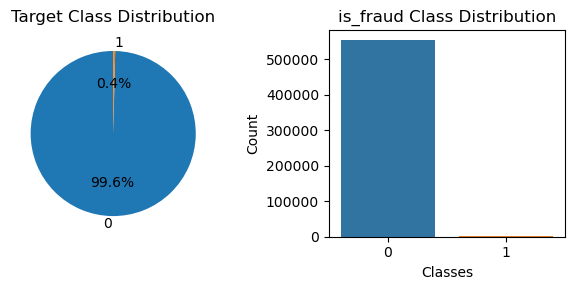

In [32]:
def get_class_counts(df,feature):
    class_count = df[feature].value_counts(normalize = True)

    colors = ["#1f77b4","#ff7f0e","#2ca02c", "#d62728","#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22",]
    
    plt.figure(figsize=(6,3))

    plt.subplot(1,2,1)
    class_count.plot.pie(autopct='%1.1f%%', startangle=90, colors = colors )
    plt.title('Target Class Distribution')
    plt.ylabel('')

    plt.subplot(1,2,2)
    sns.countplot(x = feature, data=df, palette='tab10')
    plt.title(f"{feature} Class Distribution")
    plt.xlabel('Classes')
    plt.ylabel('Count')

    
    plt.tight_layout()
    plt.show()

get_class_counts(df,'is_fraud')

So as we can clearly see our dataset is heavily imbalanced. Which you would execpt for credit card transactions. Now lets delve into some techniques to handle this.

In [33]:
X = df.drop('is_fraud', axis = 1)
y = df['is_fraud']

In [34]:
# we set stratify = y so that our test split and train split have the same class distribution as the orginal dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

In [35]:
scaler = StandardScaler()

# Select numeric feature columns only (excluding the target if it's in X)
num_cols = X_train.select_dtypes(include='number').columns.drop('is_fraud', errors='ignore')

# Scale them
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])  # Only transform on test set


Now lets see how the models preform on this imbalanced dataset

In [36]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

score = lr.score(X_test, y_test)

plot_eval(y_pred,y_test)

print(f"Score of Logsitic Regression: {score}")

NameError: name 'plot_eval' is not defined

So we can see that the accuracy of the model is 100%. But as we established in imbalanced classes accuracy becomes a misleading metric.

If we look at the precision, recall, and f1-score of the minority class (1) we can see that the model prefroms very poorly all at 0. Suggesting that our model predicts 0 for every single sample.

Now lets go over the techniques we mentioned prior to handle this imbalance, we will start off with Random sampling using RandomOverSampler

In [37]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resample, y_resample = ros.fit_resample(X_train, y_train)

In [108]:
resample_y = pd.Series(y_resample).value_counts()
print(f"Resamples Dataset size: {resample_y}")

Resamples Dataset size: is_fraud
0    442859
1    442859
Name: count, dtype: int64


So as we can see our class has been balanced, now lets retrain on this balanced data

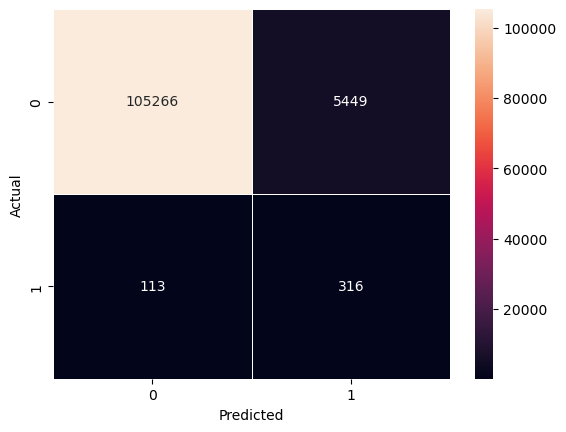

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    110715
           1       0.05      0.74      0.10       429

    accuracy                           0.95    111144
   macro avg       0.53      0.84      0.54    111144
weighted avg       1.00      0.95      0.97    111144

Score of Logsitic Regression (Resample): 0.9499568127834161


In [109]:
lr_resample = LogisticRegression()
lr_resample.fit(X_resample, y_resample)

y_pred_resample = lr_resample.predict(X_test)

score = lr_resample.score(X_test,y_test)

plot_eval(y_test,y_pred_resample)

print(f"Score of Logsitic Regression (Resample): {score}")


So as we can see the random sampled data has massively improved the recall (How many actual positives did the model catch) of our model.

However the models precision (Out of all positive predictions, how many where correct) and f1-score (Balance between false positives and recall)

Overall the classification report suggests that, out of all times the model predicted fraud (1), it was right only 5% of the time. So alot of false positives. Because precision is so low, the F1 score suffers. Telling us telling you the fraud detection performance is weak overall.

Now lets see the ROC curves

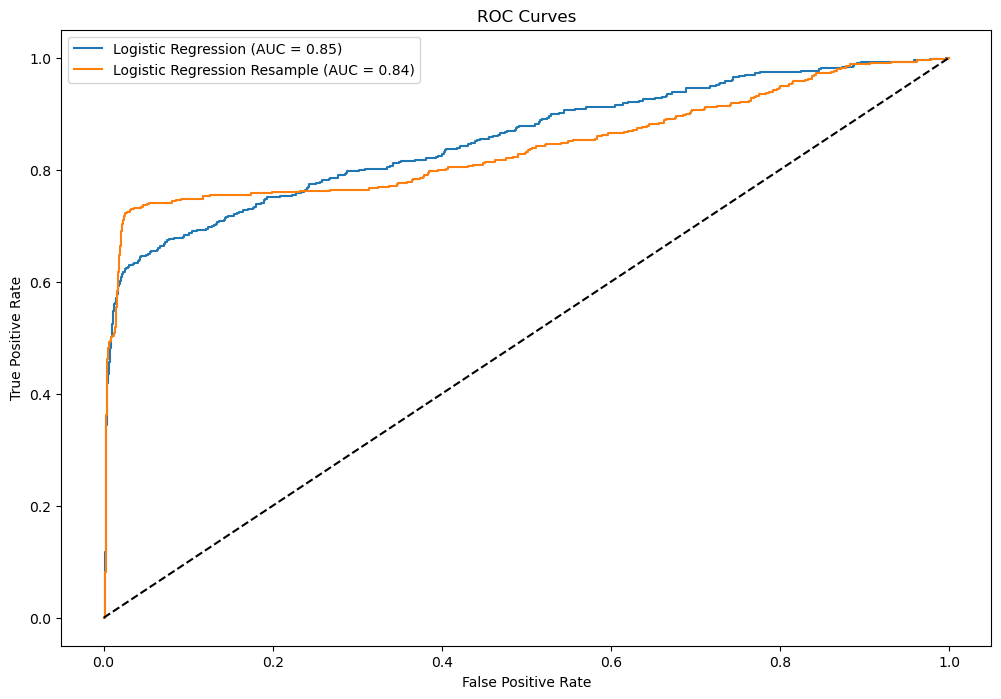

In [110]:
y_pred_lr = lr.predict_proba(X_test)[:, 1]
y_pred_resample = lr_resample.predict_proba(X_test)[:, 1]
    
fpr, tpr,_ = roc_curve(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_pred_lr)
    
fpr_resample, tpr_resample,_ = roc_curve(y_test, y_pred_resample)
roc_auc_resample = roc_auc_score(y_test, y_pred_resample)
    
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot(fpr_resample, tpr_resample, label=f'Logistic Regression Resample (AUC = {roc_auc_resample:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


The dashed line shows the preformance of a random guessing model that preforms at AUC = 0.5. Meaning its as the modely randomy guesses between the binary classifications. 

The Blue line represents the Logisitic Regression model which preforms much better than random model. AUC = 0.85 means theres an 85% that the model ranks a positive instance than a random negative one.

The orange line represents the Logsitic Regression after we resampled the data imbalance. So we see this model preforms slightly less than the inital model. However in severe imbalance datasets the AUC may be misleading. 

Now lets explore the Cross Validated Precision Recall Curves.

In [111]:
# We use stratifiedKFold to preserve the class distribution of each fold

skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

lr_resample_cv = LogisticRegression(max_iter=100, random_state=42)

roc_auc_scores = cross_val_score(
    lr_resample,X_resample,y_resample,cv=skf,scoring = 'roc_auc', n_jobs=-1
)

print(f"Mean Cross Validated ROC AUC Scores for Logisitc Regression Model (Resample): {roc_auc_scores.mean():.2f}")

Mean Cross Validated ROC AUC Scores for Logisitc Regression Model (Resample): 0.85


Now lets view the PR curves of the Cross Validated scores

In [105]:
# Code From: https://www.youtube.com/watch?v=yeWaP9AC6UQ&t=1198s


def cross_val_pr_curve(model, X,y,cv):
    tprs = []
    aucs = []
    mean_recall = np.linspace(0,1,100)

    precision_list = []
    recall_list = []
    average_precision_list = []

    for train_index, test_index in cv.split(X,y):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        X_res_cv, y_res_cv = ros.fit_resample(X_train_cv,y_train_cv)

        model.fit(X_res_cv,y_res_cv)

        y_probas = model.predict_proba(X_test_cv)[:,1]

        precision, recall,_ = precision_recall_curve(y_test_cv, y_probas)
        average_precision = average_precision_score(y_test_cv, y_probas)

        precision_list.append(precision)
        recall_list.append(recall)

        average_precision_list.append(average_precision)

    return precision_list, recall_list, average_precision_list
    

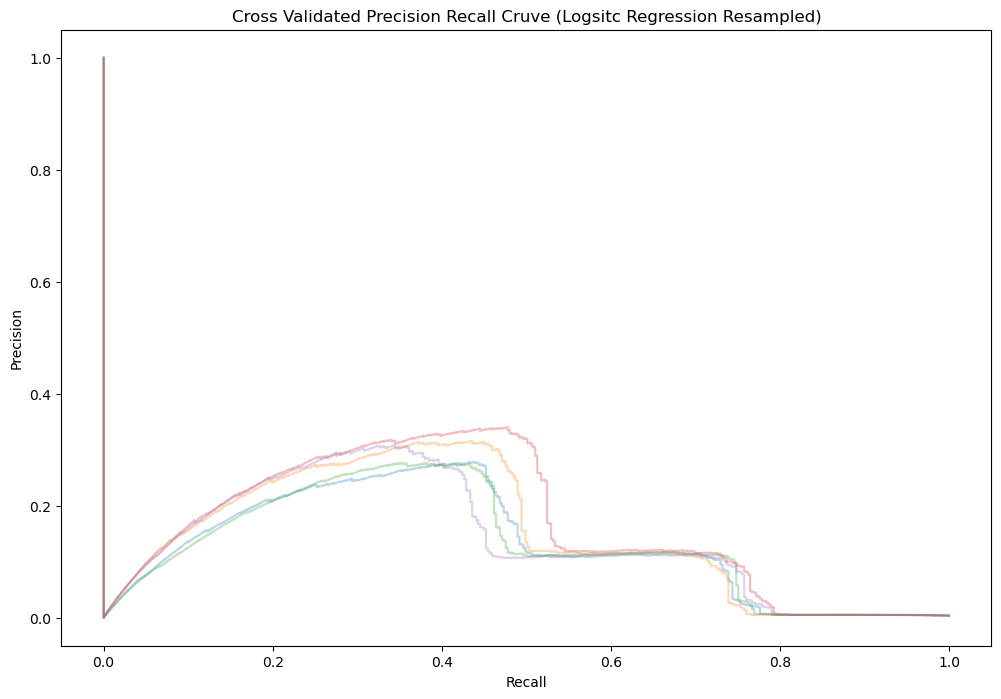

In [106]:
precision_list_lr, recall_list_lr,average_precision_list_lr = cross_val_pr_curve(lr_resample_cv,X,y,skf)

plt.figure(figsize=(12,8))


for i in range(len(precision_list_lr)):
    plt.plot(recall_list_lr[i],precision_list_lr[i],alpha = 0.3,
            label = f'Fold {average_precision_list_lr[i]}')

plt.title('Cross Validated Precision Recall Cruve (Logsitc Regression Resampled)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [107]:
mean_average_precision_lr = np.mean(average_precision_list_lr)
print(f"Mean Average Precision Score (Logisitic Regression): {mean_average_precision_lr}")

Mean Average Precision Score (Logisitic Regression): 0.13858536580851272


As we can see, the Precision-Recall (PR) performance is much lower than the overall accuracy. This is expected, because PR focuses only on the positive class — in this case, the fraudulent transactions.

Since fraud cases are rare, PR gives a more realistic picture of how well the model detects actual fraud. Accuracy, on the other hand, can be very misleading in imbalanced datasets — a model can have high accuracy just by predicting everything as non-fraud, because the majority of the data is negative.

This is also why ROC AUC can sometimes give a false sense of confidence. While ROC plots the True Positive Rate vs False Positive Rate, it still includes the overwhelming number of negatives in the False Positive Rate. In imbalanced datasets like this one, the ROC AUC may look good simply because the model correctly classifies the majority class — not because it’s good at catching the rare positives (fraud cases).

In addition the method of oversampling may introduce overfitting as the model is exposed to duplicate data, espically since there was such a small minority of classes. Resulting in the model memorizing specific patterns.

In contrast, PR curves highlight performance where it matters most detecting fraud and therefore are more appropriate when evaluating models on imbalanced datasets.

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

sm = SMOTE(random_state=42)

X_smote, y_smote = sm.fit_resample(X_train,y_train)

In [113]:
smote_y = pd.Series(y_smote).value_counts()
print(f"SMOTE Dataset size: {smote_y}")

SMOTE Dataset size: is_fraud
0    415180
1    415180
Name: count, dtype: int64


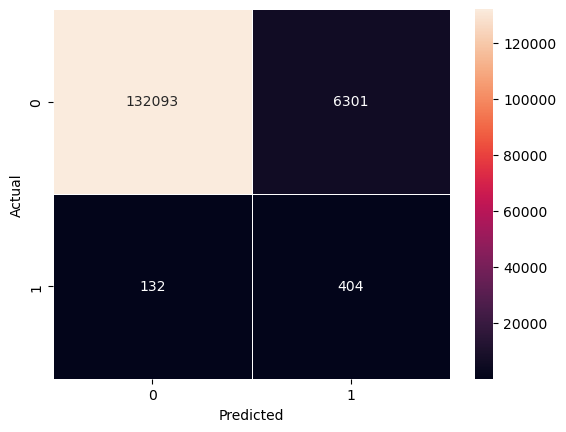

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    138394
           1       0.06      0.75      0.11       536

    accuracy                           0.95    138930
   macro avg       0.53      0.85      0.54    138930
weighted avg       1.00      0.95      0.97    138930

Score of Logistic Regression: 0.953696105952638


In [115]:
lr_smote = LogisticRegression(max_iter=100, random_state=42)

lr_smote.fit(X_smote, y_smote)

y_pred_smote = lr_smote.predict(X_test)

score = lr_smote.score(X_test,y_test)

plot_eval(y_test,y_pred_smote)

print(f"Score of Logistic Regression: {score}")

So we can see the precision and f1-score of the model is quite poor.
Low Precision means of all positive predictions, many of them where wrong. So in our dataset the model is flagging transactions as fraud when they are not

Since F1-Score is the ratio of precision and recall, since precision is low f1 will be low.

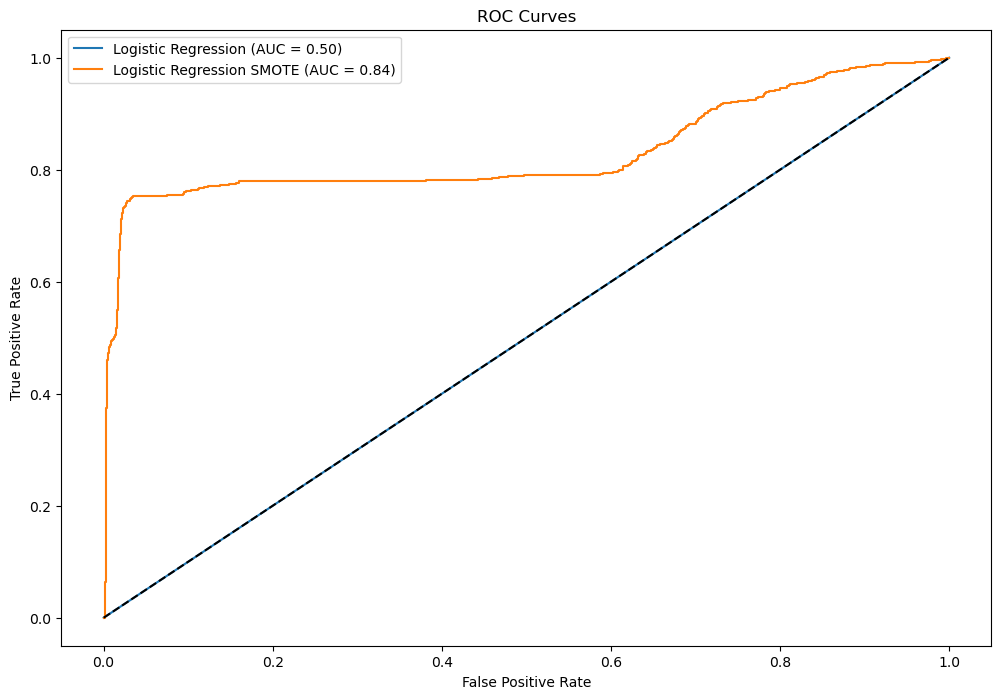

In [111]:
y_pred_lr = lr.predict_proba(X_test)[:, 1]
y_pred_smote = lr_smote.predict_proba(X_test)[:, 1]
    
fpr, tpr,_ = roc_curve(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_pred_lr)
    
fpr_smote, tpr_smote,_ = roc_curve(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, y_pred_smote)
    
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot(fpr_smote, tpr_smote, label=f'Logistic Regression SMOTE (AUC = {roc_auc_resample:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


## Multiclass and Multilabel Classification

So far we have only tackled the issues of binary classifcation tasks, where theres only 2 labels 1 or 0. 


1. Multiclass: Predicting one label from 3 or more classes
    - classifying an image (one label) of a dog, cat, lion, panda (3 classes)
2. Multilabel: Each input has multiple labels
    - classifying a movies genre, Action, Drama, Comedy (3 Labels)

### Challenges

- With multiple labels and classes comes a higher degree of complexitity
- The problem with imbalance can now stretch through multiple classes

With this out of the way lets delve deeper into multiclass tasks and challenges

### Multiclass

So the key concept of multiclass tasks is identifying one label out of a set of multiple classes. For most of the models we have used so far (Logistic Regression, Decision Trees, etc) they handle binary classes. So for multiclass tasks we have to deploy some new strategies

#### Approaching multiclass tasks

1. One-vs-Rest (OvR): Builds one binary classifer (Logisitic Regression, Decision Tree, etc) per class.
    - For each classifier, the model determines if the sample is in their class
    - Each classifer gives a score (probability)
    - Then the class with the highest score is chosen
2. One-vs-One (OvO): Trains a classifer for each pair of classes, so it becmoes a binary problem. So if you have 3 classes: A,B,C. OvO trains...
    - A vs B
    - A vs C
    - C vs B
    - The label with most wins is chosen
3. Multinomial Models: Extends binary classification to handle multiple classes directly

#### Metrics

- Macro-Averaging: Averages equal weight per class
- Micro-Averaging: Weight by support (i.e., number of samples in each class).

For this section we will use the red wine dataset from: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [116]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [117]:
df.shape

(1599, 12)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [119]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Now lets look at our target feature

In [120]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

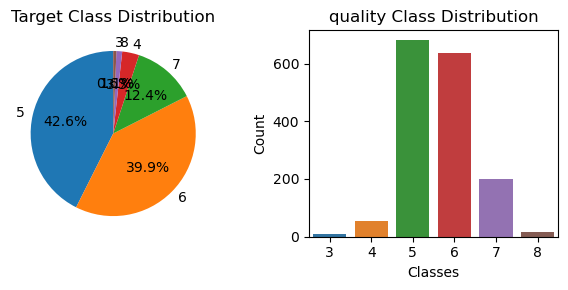

In [121]:
get_class_counts(df,'quality')

So as we can see our dataset is heavily imbalanced. Lets see all the ways we can handle this

But before that lets prepare our dataset for modeling

In [122]:
X = df.drop('quality', axis = 1)
y = df['quality']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42, stratify=y)

Now lets handle the class imbalance, we can first try using SMOTE

SMOTE Dataset size: quality
6    545
5    545
7    545
3    545
4    545
8    545
Name: count, dtype: int64


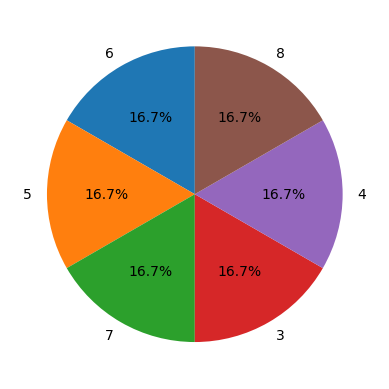

In [130]:
sm = SMOTE(random_state=42)

X_smote, y_smote = sm.fit_resample(X_train, y_train)

smote_y = pd.Series(y_smote).value_counts()
smote_y.plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
print(f"SMOTE Dataset size: {smote_y}")

So as we can see the classes have been balanced, now lets implement OvR and OvO. We will do this using Logisitc Regression

Heat Map of One Vs Rest


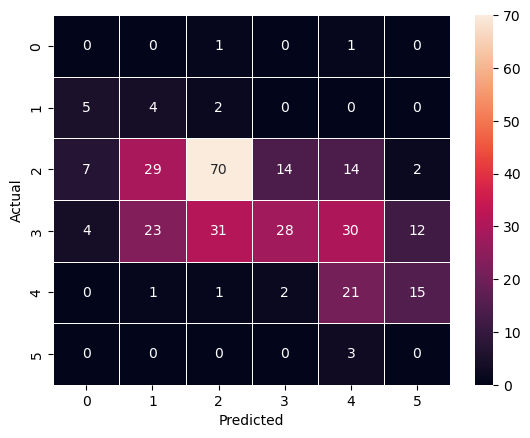

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.07      0.36      0.12        11
           5       0.67      0.51      0.58       136
           6       0.64      0.22      0.33       128
           7       0.30      0.53      0.39        40
           8       0.00      0.00      0.00         3

    accuracy                           0.38       320
   macro avg       0.28      0.27      0.23       320
weighted avg       0.58      0.38      0.43       320



In [126]:
# Create One vs Rest Logsitic Regression Model
lr_ovr = OneVsRestClassifier(
    LogisticRegression(solver = 'lbfgs',max_iter=100, random_state=42)
)

lr_ovr.fit(X_smote,y_smote)

y_pred_ovr = lr_ovr.predict(X_test)

print("Heat Map of One Vs Rest")
plot_eval(y_test,y_pred_ovr)


Heat Map of One Vs One


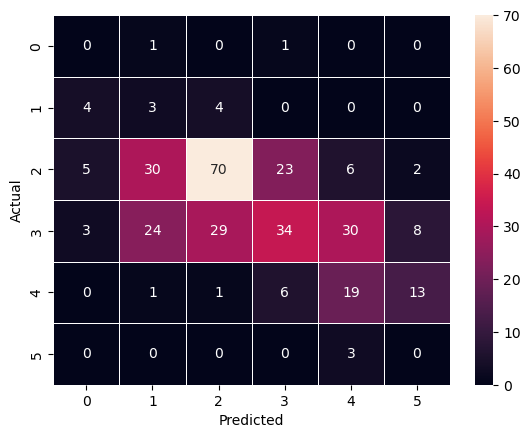

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.05      0.27      0.09        11
           5       0.67      0.51      0.58       136
           6       0.53      0.27      0.35       128
           7       0.33      0.47      0.39        40
           8       0.00      0.00      0.00         3

    accuracy                           0.39       320
   macro avg       0.26      0.25      0.24       320
weighted avg       0.54      0.39      0.44       320



In [127]:
# Create One vs One Logsitic Regression Model
lr_ovo = OneVsOneClassifier(
    LogisticRegression(solver = 'lbfgs', max_iter=100, random_state=42)
)
lr_ovo.fit(X_smote,y_smote)

y_pred_ovo = lr_ovo.predict(X_test)

print("Heat Map of One Vs One")
plot_eval(y_test,y_pred_ovo)


### Multilabel Classification

Multilabels means each sample can belong to zero or more classes at the same time, wher labels are not mutually exclusive

Movie Genre Classification Example:

Labels/classes: [Action,Comedy,Drama,Romance,Sci-Fi]
Sample Label: [Action, Sci-Fi]

Because of this, outputs in multilabels are represented in vector form, like
- y = [0,1,0,1,0]

#### Approaching multilabel tasks

1. Algorithm Adaption Models: Models designed to natively handle multilabel problems
   - Neural networks
   - Tree Based Models that are extended to handle multiple labels
   - K-NN
   - SVM

#### Metrics for Multilabel Classification

- Hamming Loss: Fraction of incorrect labels
- Exact Match Ratio: Ratio of samples with all labels
- Label Ranking Average Precision (LRAP)


We will create our own syntheic dataset to showcase multilabel

In [14]:
X,y = make_multilabel_classification(n_samples=1000,n_features=20, n_classes=5, n_labels=2, allow_unlabeled=False, random_state=42)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [15]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.0,0.0,2.0,2.0,2.0,8.0,3.0,2.0,5.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,5.0,0.0,2.0
1,3.0,5.0,2.0,3.0,3.0,3.0,1.0,1.0,4.0,1.0,1.0,4.0,2.0,8.0,4.0,3.0,2.0,6.0,2.0,0.0
2,3.0,2.0,3.0,1.0,0.0,5.0,3.0,2.0,2.0,7.0,2.0,2.0,2.0,4.0,1.0,0.0,6.0,6.0,3.0,3.0
3,1.0,0.0,1.0,6.0,6.0,1.0,4.0,1.0,2.0,7.0,8.0,2.0,5.0,5.0,3.0,2.0,0.0,0.0,3.0,0.0
4,3.0,6.0,2.0,1.0,1.0,2.0,5.0,1.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,7.0,3.0,5.0,4.0,1.0


In [16]:
y.head()

,0,1,2,3,4
0,0,0,0,1,0
1,1,1,1,0,0
2,0,0,1,1,0
3,1,0,0,0,0
4,1,0,1,0,0


In [17]:
label_counts = y.sum()
label_counts

0    369
1    635
2    563
3    478
4    194
dtype: int64

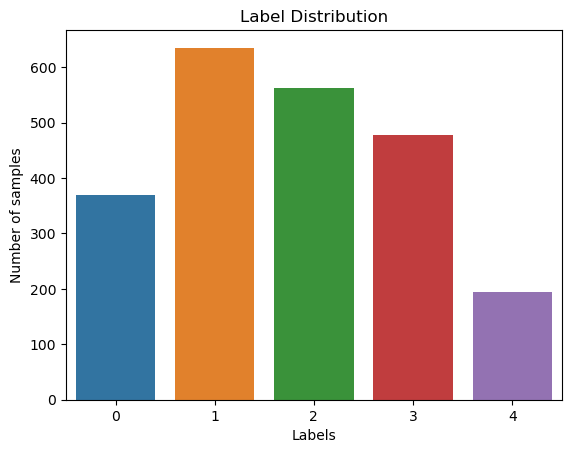

In [18]:
sns.barplot(x = label_counts.index, y = label_counts.values, palette='tab10')
plt.title("Label Distribution")
plt.xlabel('Labels')
plt.ylabel('Number of samples')
plt.show()

The labels are not balanced, but they are fine for this dataset

In [19]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

In [20]:
model = MultiOutputClassifier(LogisticRegression())

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73        92
           1       0.89      0.91      0.90       163
           2       0.85      0.82      0.84       137
           3       0.79      0.80      0.80       120
           4       0.69      0.39      0.50        51

   micro avg       0.84      0.78      0.81       563
   macro avg       0.81      0.72      0.75       563
weighted avg       0.83      0.78      0.80       563
 samples avg       0.85      0.86      0.82       563



Now lets evaluate the model used the multilabel metrics, we will begin with the Hamming Loss

#### Hamming Loss

The hamming loss is a metric telling us the fraction of labels that were predicted incorrectly. Or in other words, Hamming Loss tells us how often the model is wrong about each label. The lower the hamming loss the better the preformance

Back to our movie example, if our genres are...

Genres/Labels/classes: [Action,Comedy,Drama,Romance,Sci-Fi]

The actual tags of the sample: ['Action','Sci-Fi']

And our model predicts,
Prediction: ['Action','Comedy']

So of the 5 possible tags:
    - Actions was correct
    - it missed Sci-Fi
    - It wrongly added Comedy

Hamming Loss = 2 / 5 = 0.4



Now lets calculate this


In [21]:
from sklearn.metrics import hamming_loss

hl = hamming_loss(y_test,y_pred)
print(f"Hamming Loss: {hl}")

Hamming Loss: 0.168


#### Subset

Subset accuracy is a strict binary counts a prediction correct if all predicited labels match exactly all true labels. Or in other words, did the model get the entire answer 100% correct.

Back to our movie example, if our genres are...

Genres/Labels/classes: [Action,Comedy,Drama,Romance,Sci-Fi]

The actual tags of the sample: ['Action','Sci-Fi']

Now lets consider a few predictions our model may have

- Prediction 1: [Action, Sci-Fi] (Subset Accuracy = 1)
- Prediction 2: [Action, Drama] (Subset Accuracy = 0)
- Prediction 3: [Comedy, Drama] (Subset Accuracy = 0)

So we only get a subset accuracy = 1 if all labels are predicted correctly

Now lets calculate this


In [22]:
from sklearn.metrics import accuracy_score

subset_acc = accuracy_score(y_test,y_pred)
print(f"Subset accuracy: {subset_acc}")

Subset accuracy: 0.42


#### Label Ranking Average Precision (LRAP)

Label Ranking Average Precision measures how the model ranks true lavel higher than false ones. Or in other words, for each sample how many true labels did the model rank near the top. Rewarding the model for correct labels.

We use LRAP when the ranking of labels is of importance, giving confidence scores rather than binary outputs.

In [26]:
model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)

# Now calculate LRAP
lrap = label_ranking_average_precision_score(y_test, y_pred_proba)
print(f"Label Ranking Average Precision (LRAP): {lrap:.4f}")


Label Ranking Average Precision (LRAP): 0.9721
